In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats # For plotting QQ plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Fare','Age','Survived'])

In [3]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean())#Age e jegula missing value chilo oigula mean value diye fillup korbe
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Plotting the distribution

C:\Users\rezwa\AppData\Local\Temp\ipykernel_24588\654852740.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ plot')

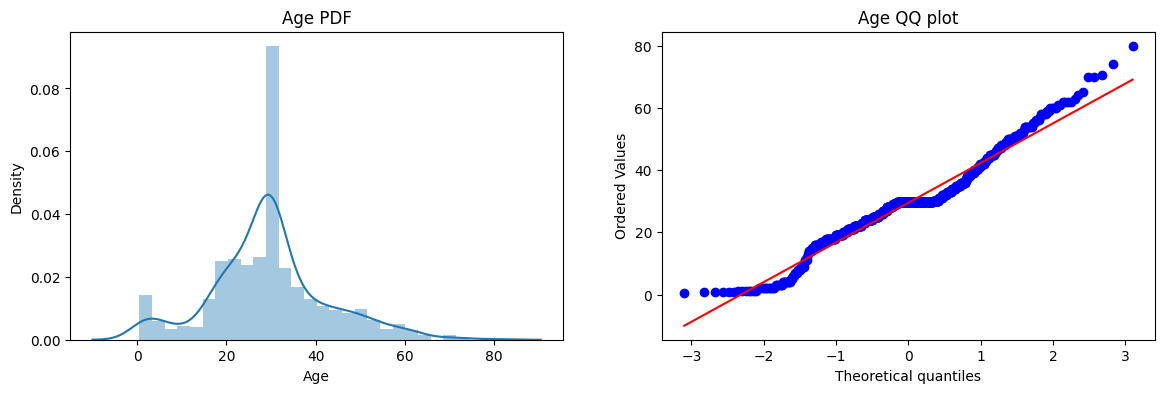

In [24]:
# For Age

plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

C:\Users\rezwa\AppData\Local\Temp\ipykernel_24588\2220307545.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ plot')

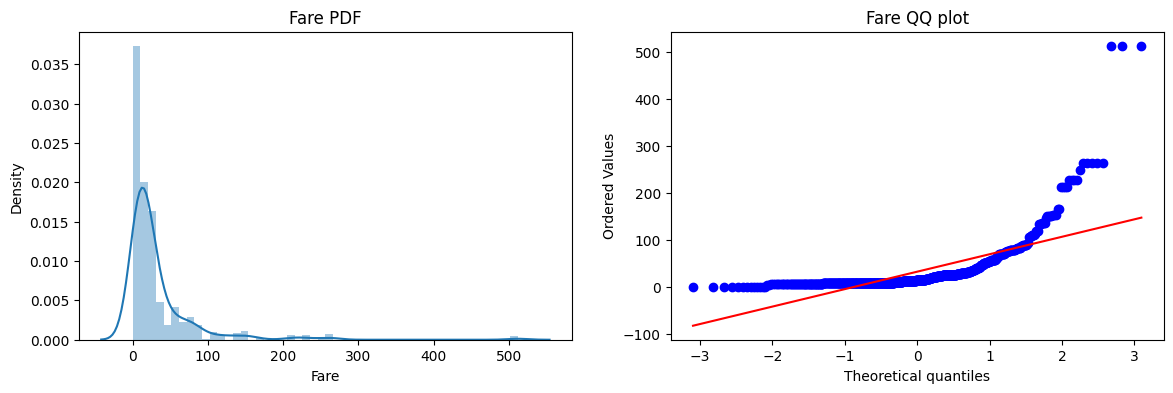

In [25]:
# For Fare
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

### Checking accuracy before and after using function transformer

In [29]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
 
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print("LR Accuracy before function transformer",accuracy_score(y_test,y_pred)*100)
print("DT Accuracy before function transformer",accuracy_score(y_test,y_pred2)*100)

LR Accuracy before function transformer 64.80446927374301
DT Accuracy before function transformer 65.36312849162012


### Use of function transformer

In [31]:
trf = FunctionTransformer(func=np.log1p)

In [33]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [35]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("LR Accuracy after function transformer",accuracy_score(y_test,y_pred)*100)
print("DT Accuracy after function transformer",accuracy_score(y_test,y_pred2)*100)

LR Accuracy after function transformer 68.15642458100558
DT Accuracy after function transformer 69.27374301675978
